AAI 5005 Graphs and Network Analysis  
Homework #1: Network analysis  
October 6, 2022  
Due date: October 17, 2022 (23:59 PM)

Department : Biomedical Systems Informatics  
Name : Suncheolheo  
Student id : 2021321629  
Submission Date : 2022-10-14  
(Discussion mate : lee joohyun) 

----------
* Tool  
You can use any existing framework/library for graph data processing. Some examples include:
  - NetworkX (python)
  - graph_tool (python)
  - snap.py (python)
  - Matlab
----------
* Items to be submitted  
  - Report in pdf (specify the software environment)
  - Zip file including the source code (.py, .ipynb, .m, .c, .cpp, …), data files, etc.
----------
* Tips
  - Rich discussion and analysis, and various efforts matter the most in grading.
  - Do not make a cover page.
  - Do not use powerpoint styles.
  - Do not put screenshots except for code and figures.
  - Figures and tables must be explained in the text.
  - Every figure must have an appropriate label on each axis.
  - You don’t need to explain your code line-by-line.
  - Specify with whom you had discussion, if you did.
----------

## 0. Network generation
- Choose two songs, and construct a network using the melody of each song as follows (if the song is too long, you can use only a part of the song):
  1) Consider each note pitch (음높이) as a node (e.g., do, do#, re, re#, …). Ignore the note duration.
  2) Put an unweighted edge between each note pitch and the following note pitch in the melody.
- Obtain an undirected network using undirected edges, and a directed network using directed edges.
- If the network is too dense, you can reduce the edge density by putting an edge between two note pitches only if the pair appear more than a certain number of times. You have a freedom to set your own policy to put edges in order to control the edge density.
----------


In [1]:
from utils import *
notes1 = readNotesFromPath('../data/Blueming_iu.mid')
print(notes1[:10])
notes2 = readNotesFromPath('../data/Michael_Jackson-Black_or_White.mid')
print(notes2[:10])

['Sol4', 'Do4', 'Re4', 'Re4', 'Re4', 'Do4', 'Re4', 'Mi4', 'Sol3', 'Sol3']
['Si4', 'Mi5', 'Sol#5', 'La5', 'Sol#5', 'Mi5', 'Si4', 'La4', 'Sol#4', 'La4']


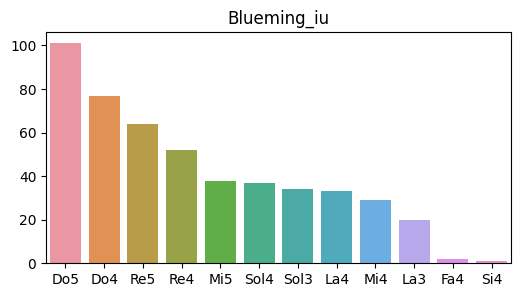

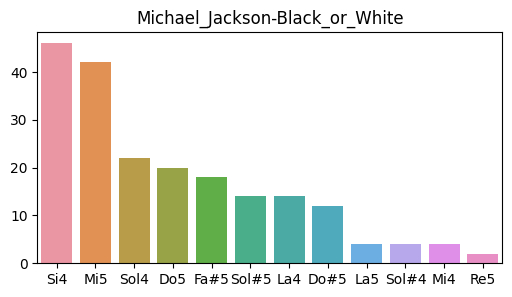

In [2]:
notes_count1 = drawCountPlot(notes1, 'Blueming_iu')
notes_count2 = drawCountPlot(notes2, 'Michael_Jackson-Black_or_White')

> Comment : 계이름별 분포를 확인하였을 때 아이유의 블루밍과, 마이클잭슨의 블랙or화이트 두 곡에서 모두 12개의 계이름이 나왔다.  
  특정 음계의 비중이 정규분포처럼 순차적으로 등장하였다. 

In [3]:
G1_UD = getUndirectedGraph(notes1, self_edges=False)
G1_D = getDirectedGraph(notes1, self_edges=False)
G2_UD = getUndirectedGraph(notes2, self_edges=False)
G2_D = getDirectedGraph(notes2, self_edges=False)

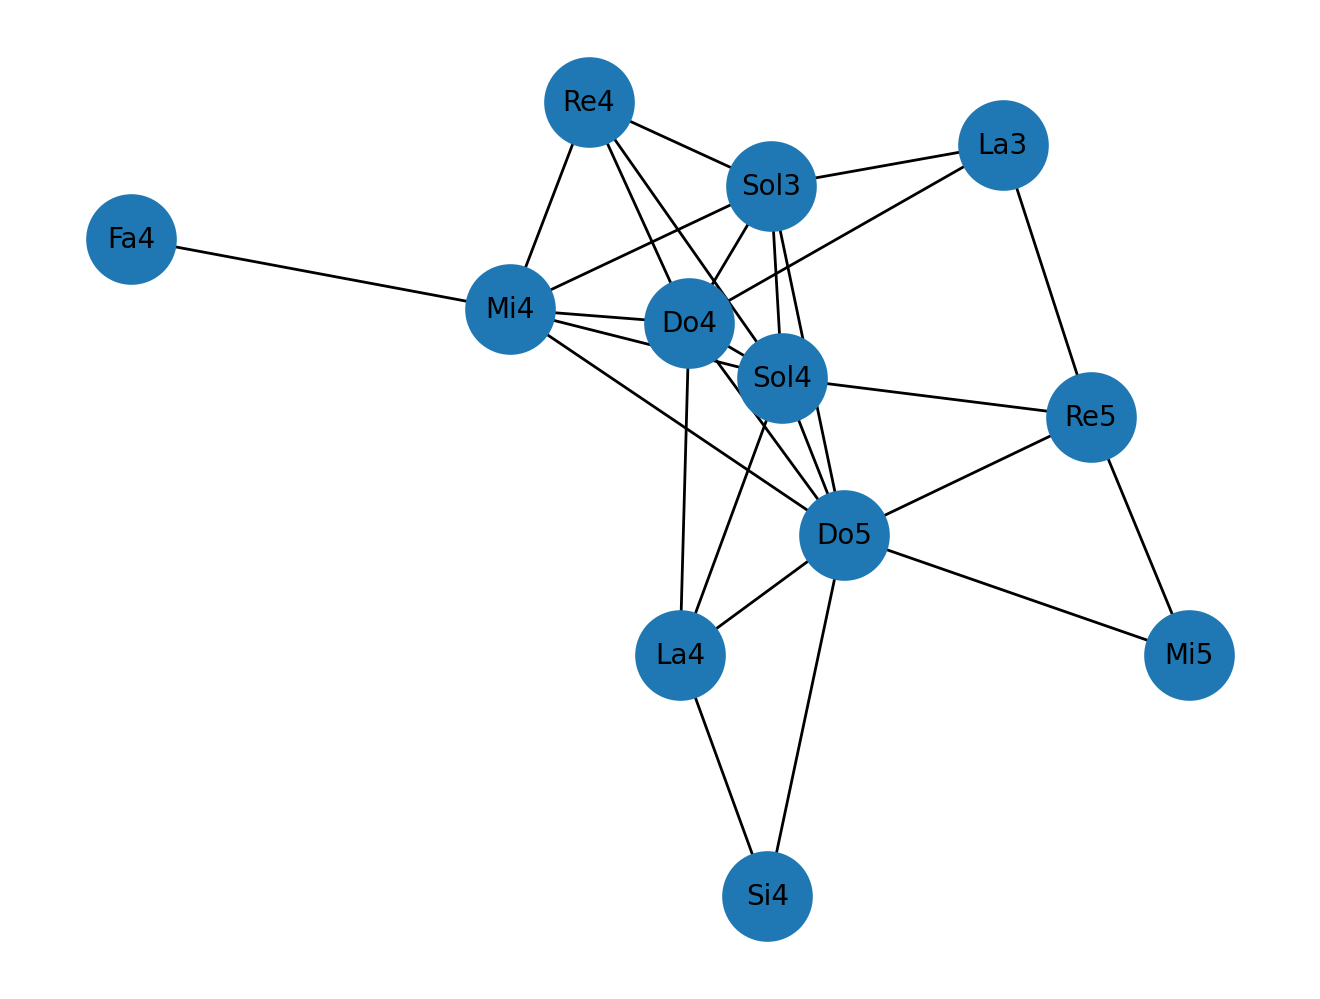

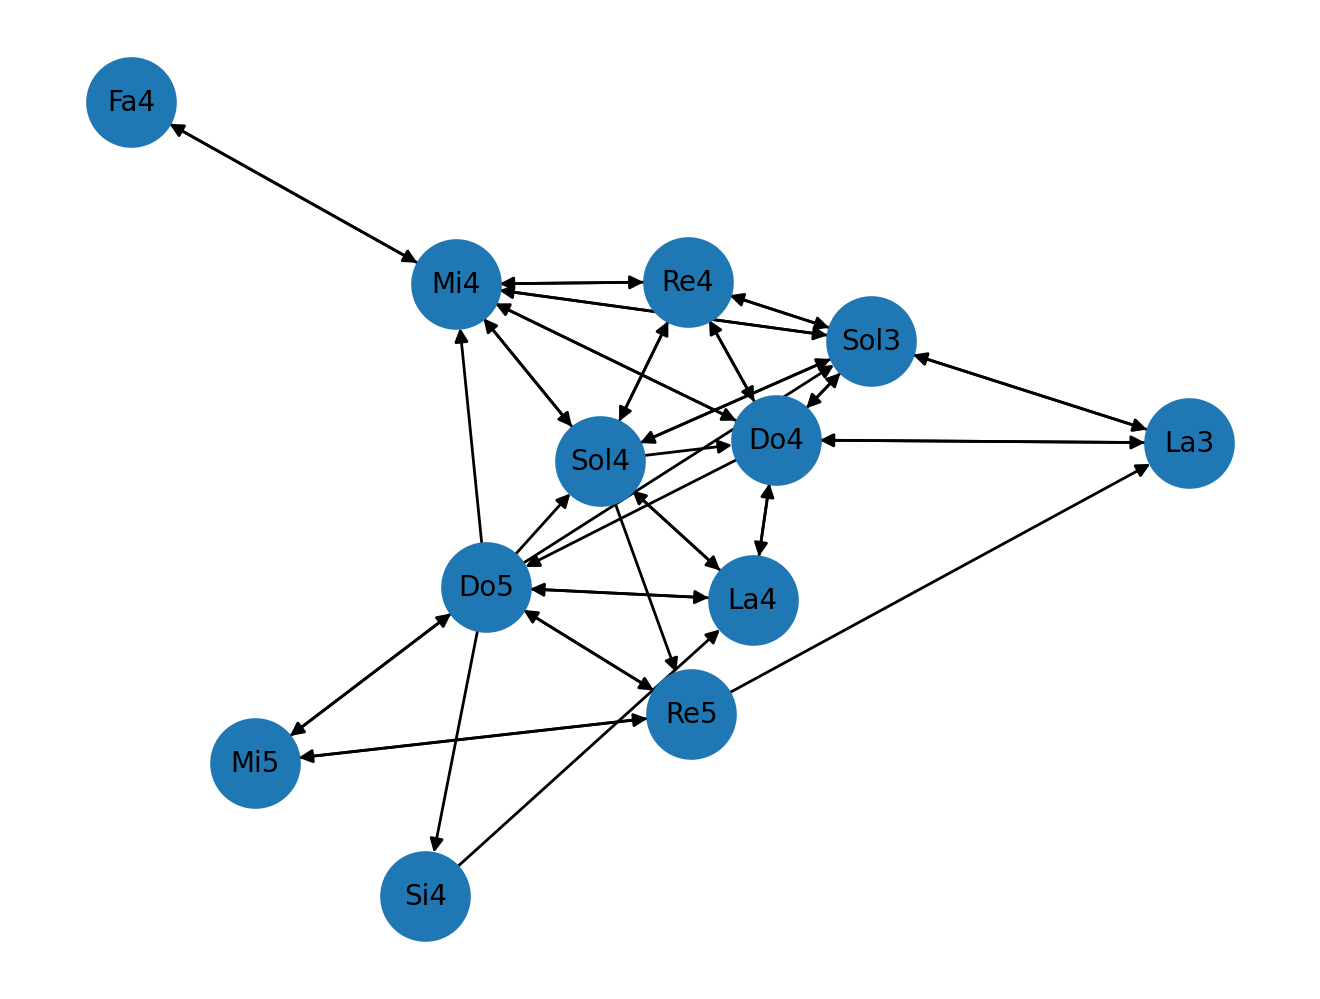

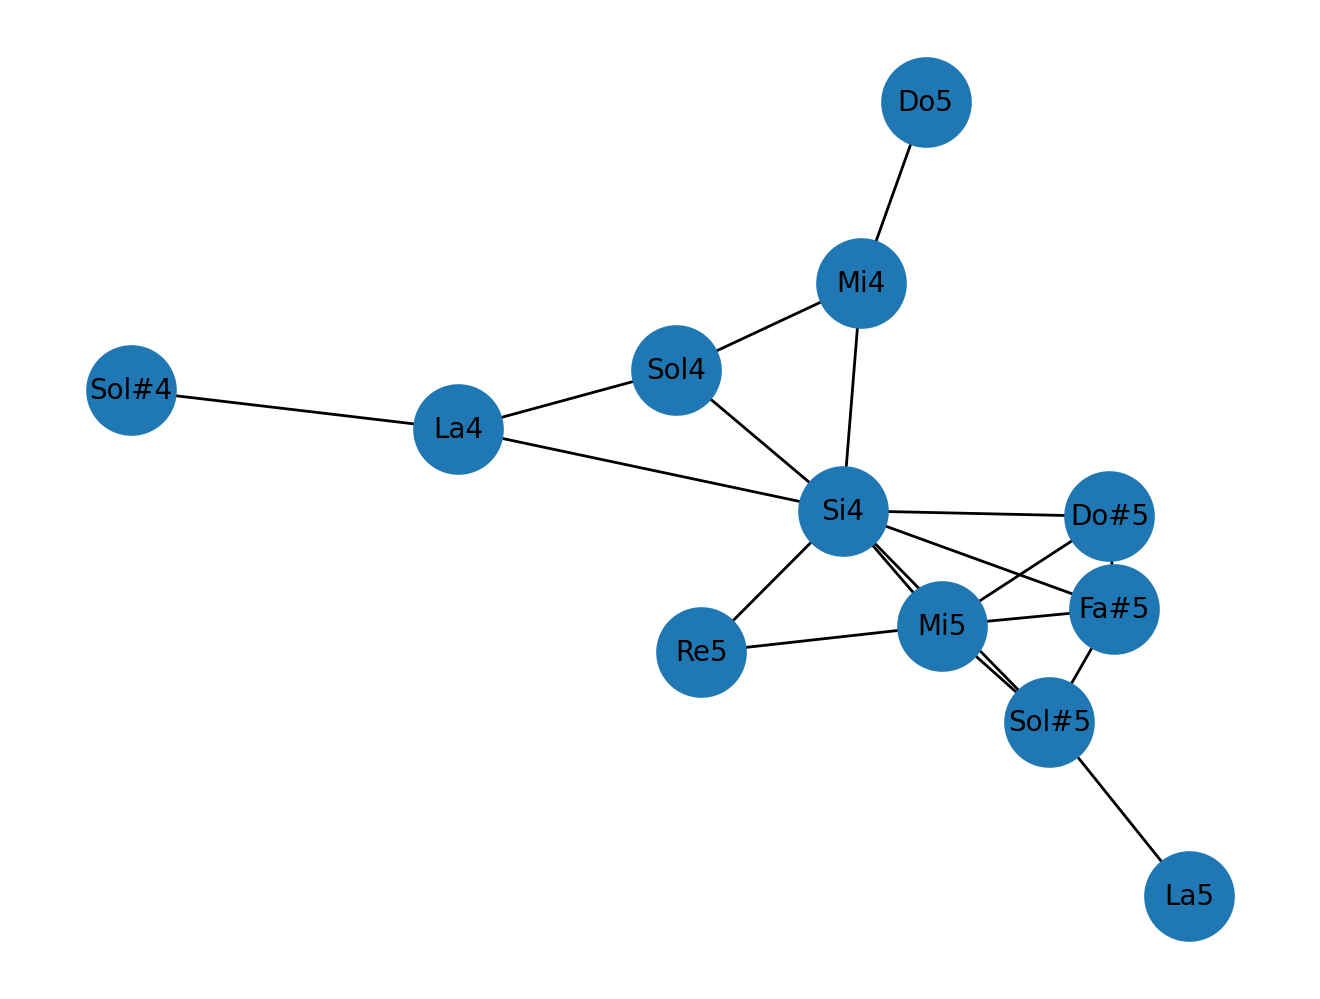

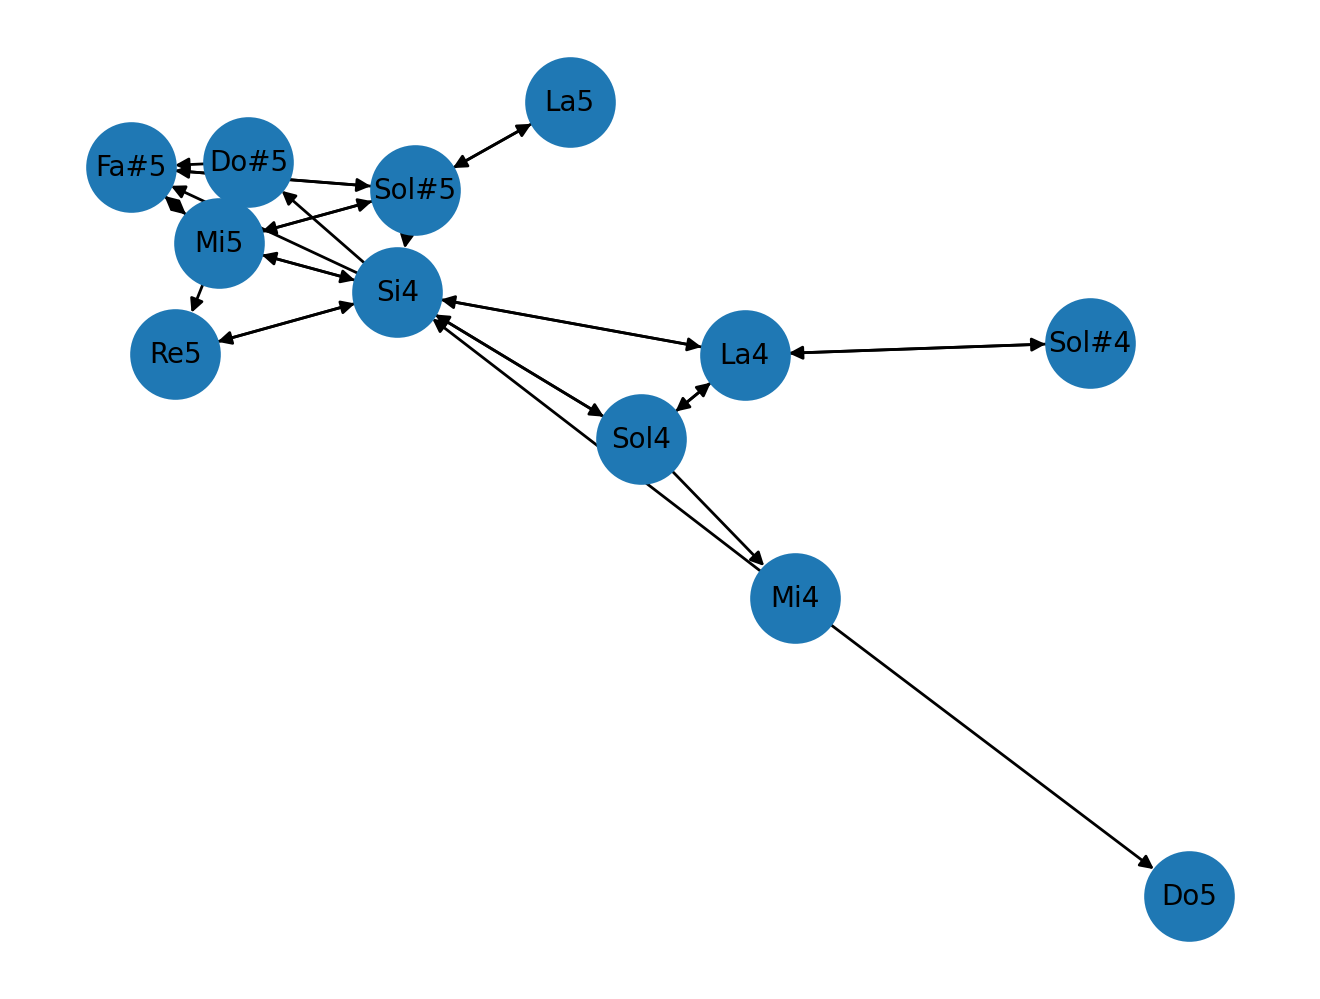

In [4]:
current_path = pathlib.Path(os.path.abspath(''))
figures_path = current_path.joinpath('figures')
figures_path.mkdir(parents=True, exist_ok=True)
savepng_path = figures_path.joinpath('note1_undirectedgraph.png')
savePlotGraph(savepng_path, G1_UD, labels=True)
savepng_path = figures_path.joinpath('note1_directedgraph.png')
savePlotGraph(savepng_path, G1_D, labels=True)
savepng_path = figures_path.joinpath('note2_undirectedgraph.png')
savePlotGraph(savepng_path, G2_UD, labels=True)
savepng_path = figures_path.joinpath('note2_directedgraph.png')
savePlotGraph(savepng_path, G2_D, labels=True)

> 많이 등장하는 음표가 중심으로 그래프가 형성되어 있음을 알 수 있다. 

In [5]:
import numpy as np
# as adjacency matrix 
print(nx.to_numpy_matrix(G1_UD))
print(nx.to_numpy_matrix(G1_D))
print(nx.to_numpy_matrix(G1_UD)-nx.to_numpy_matrix(G1_D))

[[0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.]
 [1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]]
[[0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 

> 인접행렬로 다음과 같이 표현하였을 때, 양방향성을 띄는 edge가 많아 비슷한 것처럼 보이나, 일부 다른 점이 존재한다. 

## 1. Network topology analysis (undirected case)
- For each of the obtained undirected networks, conduct following analyses. Compare the results for the two songs and discuss similarities/dissimilarities.
  1) Examine the degrees of the nodes, including mean degree, density, and degree distribution.
  2) Obtain the graph Laplacian, and examine its eigenvalues. Verify that all eigenvalues are nonnegative and the smallest eigenvalue is zero. Check also the second smallest eigenvalue.
  3) Examine the clustering coefficient of the network, and the clustering coefficients of the nodes.
  4) Compute the (unnormalized or normalized) covariance to examine assortative mixing by degree.
  5) Find cliques.
  6) Draw the network. Check the above results by looking at the drawing. Any other interesting observations can be also discussed.
----------


degree1:
 [('Sol4', 11), ('Do4', 12), ('Re4', 8), ('Mi4', 11), ('Sol3', 11), ('Fa4', 2), ('La3', 5), ('La4', 7), ('Do5', 11), ('Mi5', 4), ('Re5', 6), ('Si4', 2)]
degree2:
 [('Si4', 12), ('Mi5', 9), ('Sol#5', 7), ('La5', 2), ('La4', 6), ('Sol#4', 2), ('Do#5', 4), ('Fa#5', 6), ('Re5', 3), ('Sol4', 5), ('Mi4', 3), ('Do5', 1)]
mean_degree1:
 7.5
mean_degree2:
 5.0
density1: 0.3409090909090909
density2: 0.22727272727272727
degree_distribution1:
 [0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 4, 1]
degree_distribution2:
 [0, 1, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1]


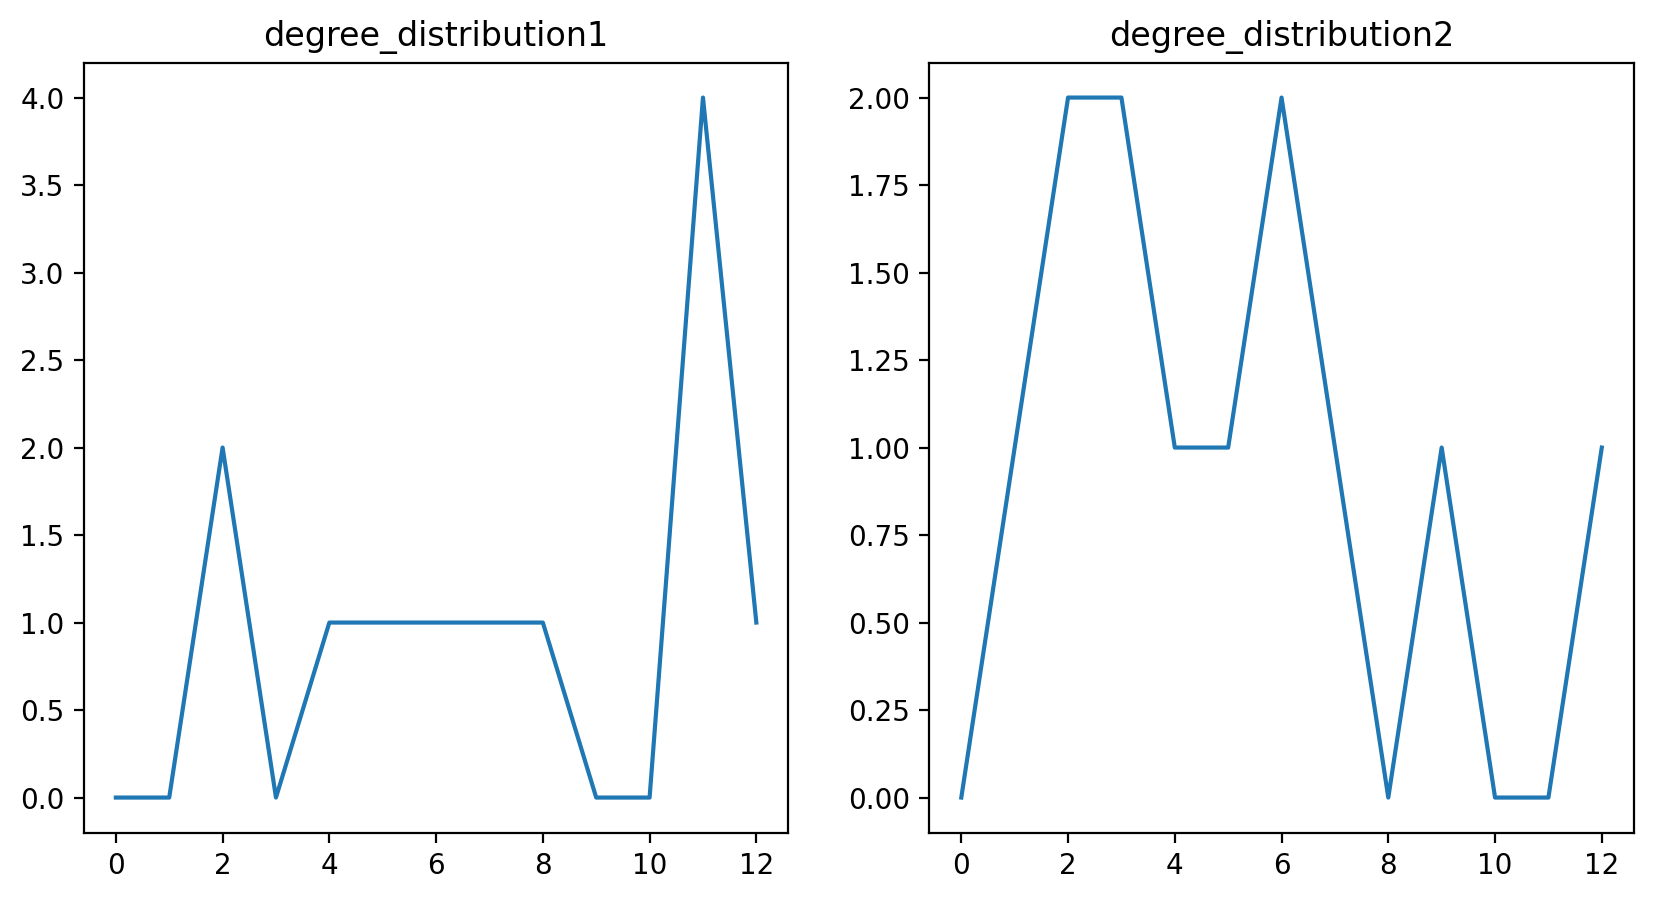

In [6]:
'''1) Examine the degrees of the nodes, including mean degree, density, and degree distribution.'''

'''1-1) Examine the degrees of the nodes'''
degree1 = G1_D.degree()
print('degree1:\n', degree1)
degree2 = G2_D.degree()
print('degree2:\n', degree2)

'''1-2) Examine the mean degree'''
mean_degree1 = np.mean(list(dict(degree1).values()))
print('mean_degree1:\n', mean_degree1)
mean_degree2 = np.mean(list(dict(degree2).values()))
print('mean_degree2:\n', mean_degree2)

'''1-3) Examine the density'''
print('density1:', nx.density(G1_D))
print('density2:', nx.density(G2_D))

'''1-4) Examine the degree distribution'''
degree_distribution1 = nx.degree_histogram(G1_D)
print('degree_distribution1:\n', degree_distribution1)
degree_distribution2 = nx.degree_histogram(G2_D)
print('degree_distribution2:\n', degree_distribution2)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(degree_distribution1)
ax[0].set_title('degree_distribution1')
ax[1].plot(degree_distribution2)
ax[1].set_title('degree_distribution2')
plt.show()

> iu의 Blumming과 Michael Jackson의 Black or White의 차이점을 분석해보자.  
> degree distribution을 보면 iu의 Blumming은 1~3, 11까지의 degree가 많고, Michael Jackson의 Black or White는 1~6까지의 degree가 많다.  
> iu의 Blumming은 특정 노드가 많은 degree를 가지고 있고, Michael Jackson의 Black or White는 모든 노드가 비슷한 degree를 가지고 있다.  
> density는 각각 0.34와 0.227로 모든 엣지의 갯수 대비 실제 엣지의 갯수인데, blumming이 더 다양한 연결을 하였다고 볼 수 있다. 

In [7]:
'''2) Obtain the graph Laplacian, and examine its eigenvalues. Verify that all eigenvalues are nonnegative and the smallest eigenvalue is zero. Check also the second smallest eigenvalue.'''

'''2-1) Obtain the graph Laplacian, and examine its eigenvalues.'''
# graph Laplacian
L1 = nx.laplacian_matrix(G1_UD).todense()
print("Laplacian matrix (G1-undirected) is\n", L1)
L2 = nx.laplacian_matrix(G2_UD).todense()
print("Laplacian matrix (G2-undirected) is\n", L2)

# eigenvalues of the Laplacian
eigenvalues1 = np.linalg.eigvals(L1)
print("eigenvalues of the Laplacian (G1-undirected) is\n", eigenvalues1)
eigenvalues2 = np.linalg.eigvals(L2)
print("eigenvalues of the Laplacian (G2-undirected) is\n", eigenvalues2)

'''2-2) Verify that all eigenvalues are nonnegative and the smallest eigenvalue is zero.'''
all_eigenvalues1 = np.all(eigenvalues1 >= 0)
print("all eigenvalues are nonnegative (G1-undirected) is", all_eigenvalues1)
all_eigenvalues2 = np.all(eigenvalues2 >= 0)
print("all eigenvalues are nonnegative (G2-undirected) is", all_eigenvalues2)

'''2-3) Check also the second smallest eigenvalue.'''
smallest_eigenvalue1 = np.min(eigenvalues1)
print("smallest eigenvalue is zero (G1-undirected) is", smallest_eigenvalue1)
smallest_eigenvalue2 = np.min(eigenvalues2)
print("smallest eigenvalue is zero (G2-undirected) is", smallest_eigenvalue2)

second_smallest_eigenvalue1 = np.sort(eigenvalues1)[1]
print("second smallest eigenvalue (G1-undirected) is", second_smallest_eigenvalue1)
second_smallest_eigenvalue2 = np.sort(eigenvalues2)[1]
print("second smallest eigenvalue (G2-undirected) is", second_smallest_eigenvalue2)


Laplacian matrix (G1-undirected) is
 [[ 7 -1 -1 -1 -1  0  0 -1 -1  0 -1  0]
 [-1  7 -1 -1 -1  0 -1 -1 -1  0  0  0]
 [-1 -1  4 -1 -1  0  0  0  0  0  0  0]
 [-1 -1 -1  6 -1 -1  0  0 -1  0  0  0]
 [-1 -1 -1 -1  6  0 -1  0 -1  0  0  0]
 [ 0  0  0 -1  0  1  0  0  0  0  0  0]
 [ 0 -1  0  0 -1  0  3  0  0  0 -1  0]
 [-1 -1  0  0  0  0  0  4 -1  0  0 -1]
 [-1 -1  0 -1 -1  0  0 -1  8 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1  2 -1  0]
 [-1  0  0  0  0  0 -1  0 -1 -1  4  0]
 [ 0  0  0  0  0  0  0 -1 -1  0  0  2]]
Laplacian matrix (G2-undirected) is
 [[ 8 -1 -1  0 -1  0 -1 -1 -1 -1 -1  0]
 [-1  5 -1  0  0  0 -1 -1 -1  0  0  0]
 [-1 -1  4 -1  0  0  0 -1  0  0  0  0]
 [ 0  0 -1  1  0  0  0  0  0  0  0  0]
 [-1  0  0  0  3 -1  0  0  0 -1  0  0]
 [ 0  0  0  0 -1  1  0  0  0  0  0  0]
 [-1 -1  0  0  0  0  3 -1  0  0  0  0]
 [-1 -1 -1  0  0  0 -1  4  0  0  0  0]
 [-1 -1  0  0  0  0  0  0  2  0  0  0]
 [-1  0  0  0 -1  0  0  0  0  3 -1  0]
 [-1  0  0  0  0  0  0  0  0 -1  3 -1]
 [ 0  0  0  0  0  0  0  0  0

> L(Unnormalized Laplacian matrix)는 D(degree matrix)에서 W(Adjacency matrix)를 뺀 값과 같다. L = D - W  
> Symmetric, Non-positive off-diagonals, Diagonal dominant 특성을 가지고 있다.   
> Lapalacian matrix는 대각 성분으로 좌우가 대칭이여서 Positive semi-definite matrix이고 성질로 인해 모든 고유값이 실수이기에 고유값 분해가 가능하다.  
> eigenvalue가 작을수록 그래프에 대한 의미를 많이 가지고 있을 수 있다.  


In [8]:
'''3) Examine the clustering coefficient of the network, and the clustering coefficients of the nodes.'''

'''3-1) Examine the clustering coefficient of the network.'''
clustering_coefficient1 = nx.average_clustering(G1_UD)
print("clustering coefficient (G1-undirected) is", clustering_coefficient1)
clustering_coefficient2 = nx.average_clustering(G2_UD)
print("clustering coefficient (G2-undirected) is", clustering_coefficient2)

'''3-2) Examine the clustering coefficients of the nodes.'''
clustering_coefficients1 = nx.clustering(G1_UD)
print("clustering coefficients (G1-undirected) is", clustering_coefficients1)
clustering_coefficients2 = nx.clustering(G2_UD)
print("clustering coefficients (G2-undirected) is", clustering_coefficients2)


clustering coefficient (G1-undirected) is 0.5946428571428571
clustering coefficient (G2-undirected) is 0.46269841269841266
clustering coefficients (G1-undirected) is {'Sol4': 0.5714285714285714, 'Do4': 0.5714285714285714, 'Re4': 1.0, 'Mi4': 0.6, 'Sol3': 0.6666666666666666, 'Fa4': 0, 'La3': 0.3333333333333333, 'La4': 0.6666666666666666, 'Do5': 0.39285714285714285, 'Mi5': 1.0, 'Re5': 0.3333333333333333, 'Si4': 1.0}
clustering coefficients (G2-undirected) is {'Si4': 0.2857142857142857, 'Mi5': 0.6, 'Sol#5': 0.5, 'La5': 0, 'La4': 0.3333333333333333, 'Sol#4': 0, 'Do#5': 1.0, 'Fa#5': 0.8333333333333334, 'Re5': 1.0, 'Sol4': 0.6666666666666666, 'Mi4': 0.3333333333333333, 'Do5': 0}


> '결집계수(Clustering Coefficient)'는 네트워크의 결집도를 정량화 하는 한 방법인데, 특정 node i 의 이웃과 이웃이 서로 이웃인 경우를, 모든 가능한 경우 'k(k-1)/2'로 나눈 값을 지역(local) 결집계수로 정의한다.
> iu의 blueming이 mj의 black or white보다 더 결집성이 좋다. 결집성이 좋다는 것은 곡이 다양하게 전개된다고 볼 수 있을 것 같다. 

In [9]:
'''4) Compute the (unnormalized or normalized) covariance to examine assortative mixing by degree.'''
# unnormalized covariance
unnormalized_covariance1 = nx.degree_pearson_correlation_coefficient(G1_UD)
print("unnormalized covariance (G1-undirected) is", unnormalized_covariance1)
unnormalized_covariance2 = nx.degree_pearson_correlation_coefficient(G2_UD)
print("unnormalized covariance (G2-undirected) is", unnormalized_covariance2)

# normalized covariance
normalized_covariance1 = nx.degree_pearson_correlation_coefficient(G1_UD, x='out', y='in')
print("normalized covariance (G1-undirected) is", normalized_covariance1)
normalized_covariance2 = nx.degree_pearson_correlation_coefficient(G2_UD, x='out', y='in')
print("normalized covariance (G2-undirected) is", normalized_covariance2)

mixing_matrix1 = nx.degree_mixing_matrix(G1_UD)
print("mixing matrix (G1-undirected) is \n", mixing_matrix1)
mixing_matrix2 = nx.degree_mixing_matrix(G2_UD)
print("mixing matrix (G2-undirected) is \n", mixing_matrix2)


unnormalized covariance (G1-undirected) is -0.15384615384615383
unnormalized covariance (G2-undirected) is -0.19175627240143367
normalized covariance (G1-undirected) is -0.15384615384615383
normalized covariance (G2-undirected) is -0.19175627240143367
mixing matrix (G1-undirected) is 
 [[0.         0.         0.         0.         0.01851852 0.
  0.        ]
 [0.         0.         0.         0.03703704 0.         0.
  0.03703704]
 [0.         0.         0.         0.01851852 0.01851852 0.01851852
  0.        ]
 [0.         0.03703704 0.01851852 0.         0.03703704 0.09259259
  0.03703704]
 [0.01851852 0.         0.01851852 0.03703704 0.03703704 0.07407407
  0.03703704]
 [0.         0.         0.01851852 0.09259259 0.07407407 0.03703704
  0.03703704]
 [0.         0.03703704 0.         0.03703704 0.03703704 0.03703704
  0.        ]]
mixing matrix (G2-undirected) is 
 [[0.         0.         0.05263158 0.02631579 0.         0.        ]
 [0.         0.         0.         0.         0.02

In [10]:
'''5) Find cliques.'''
# cliques
cliques1 = nx.find_cliques(G1_UD)
print("cliques (G1-undirected) is\n", list(cliques1))
cliques2 = nx.find_cliques(G2_UD)
print("cliques (G2-undirected) is\n", list(cliques2))

cliques (G1-undirected) is
 [['Fa4', 'Mi4'], ['La3', 'Do4', 'Sol3'], ['La3', 'Re5'], ['Re4', 'Do4', 'Sol4', 'Mi4', 'Sol3'], ['Do5', 'Sol4', 'Do4', 'La4'], ['Do5', 'Sol4', 'Do4', 'Mi4', 'Sol3'], ['Do5', 'Sol4', 'Re5'], ['Do5', 'Si4', 'La4'], ['Do5', 'Mi5', 'Re5']]
cliques (G2-undirected) is
 [['La5', 'Sol#5'], ['Sol#4', 'La4'], ['Si4', 'La4', 'Sol4'], ['Si4', 'Sol4', 'Mi4'], ['Si4', 'Mi5', 'Re5'], ['Si4', 'Mi5', 'Fa#5', 'Sol#5'], ['Si4', 'Mi5', 'Fa#5', 'Do#5'], ['Do5', 'Mi4']]


> 그래프 G의 cliques 완전 그래프인 부분 그래프이다. 즉, 꼭짓점으로 이루어진 집합 중 모든 두 꼭짓점이 변으로 연결되어 있는 집합

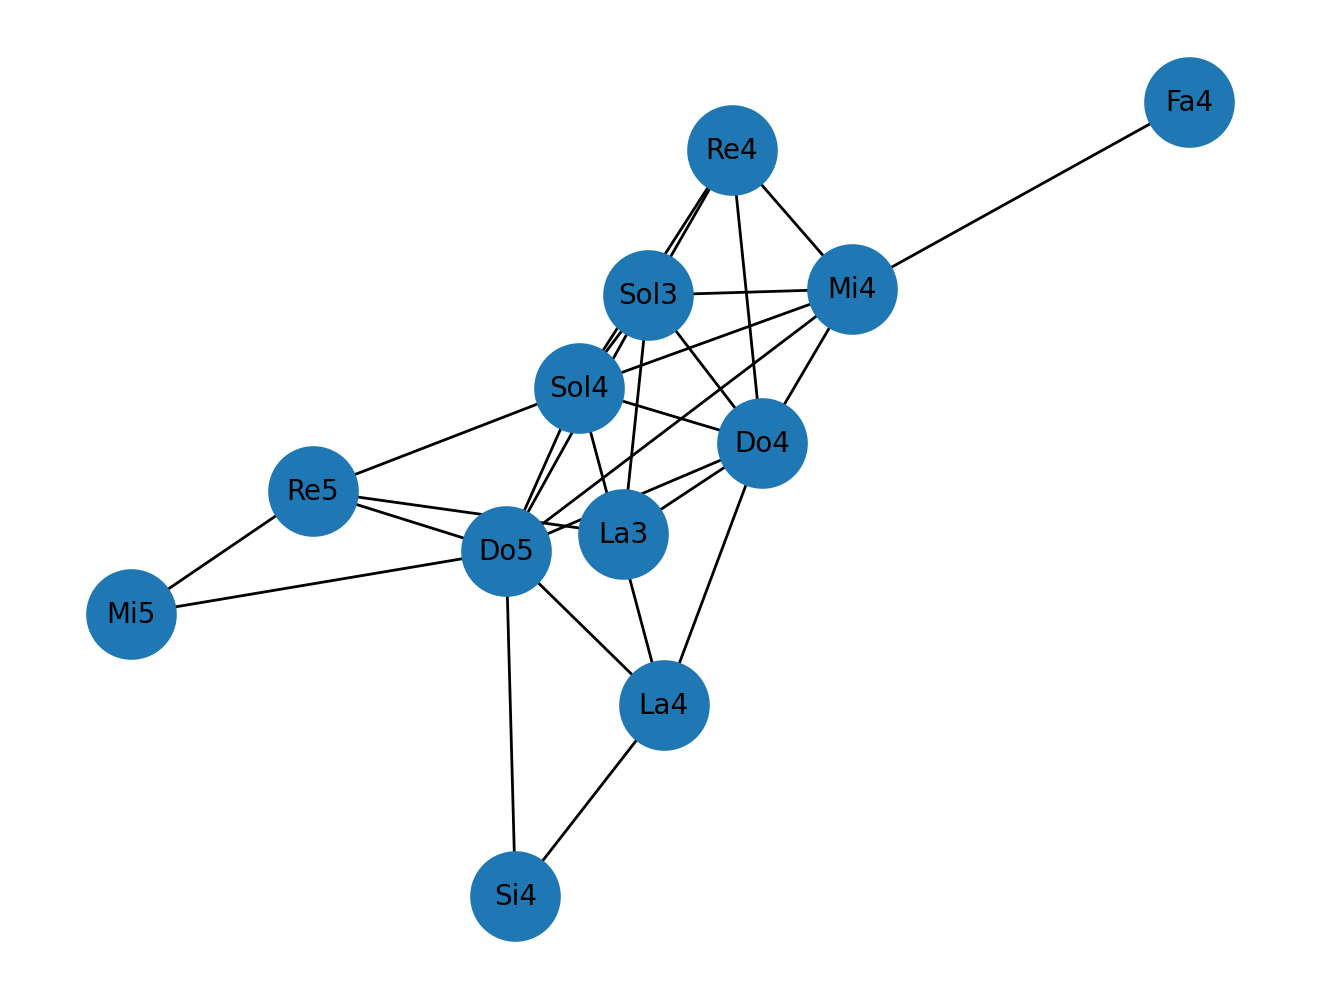

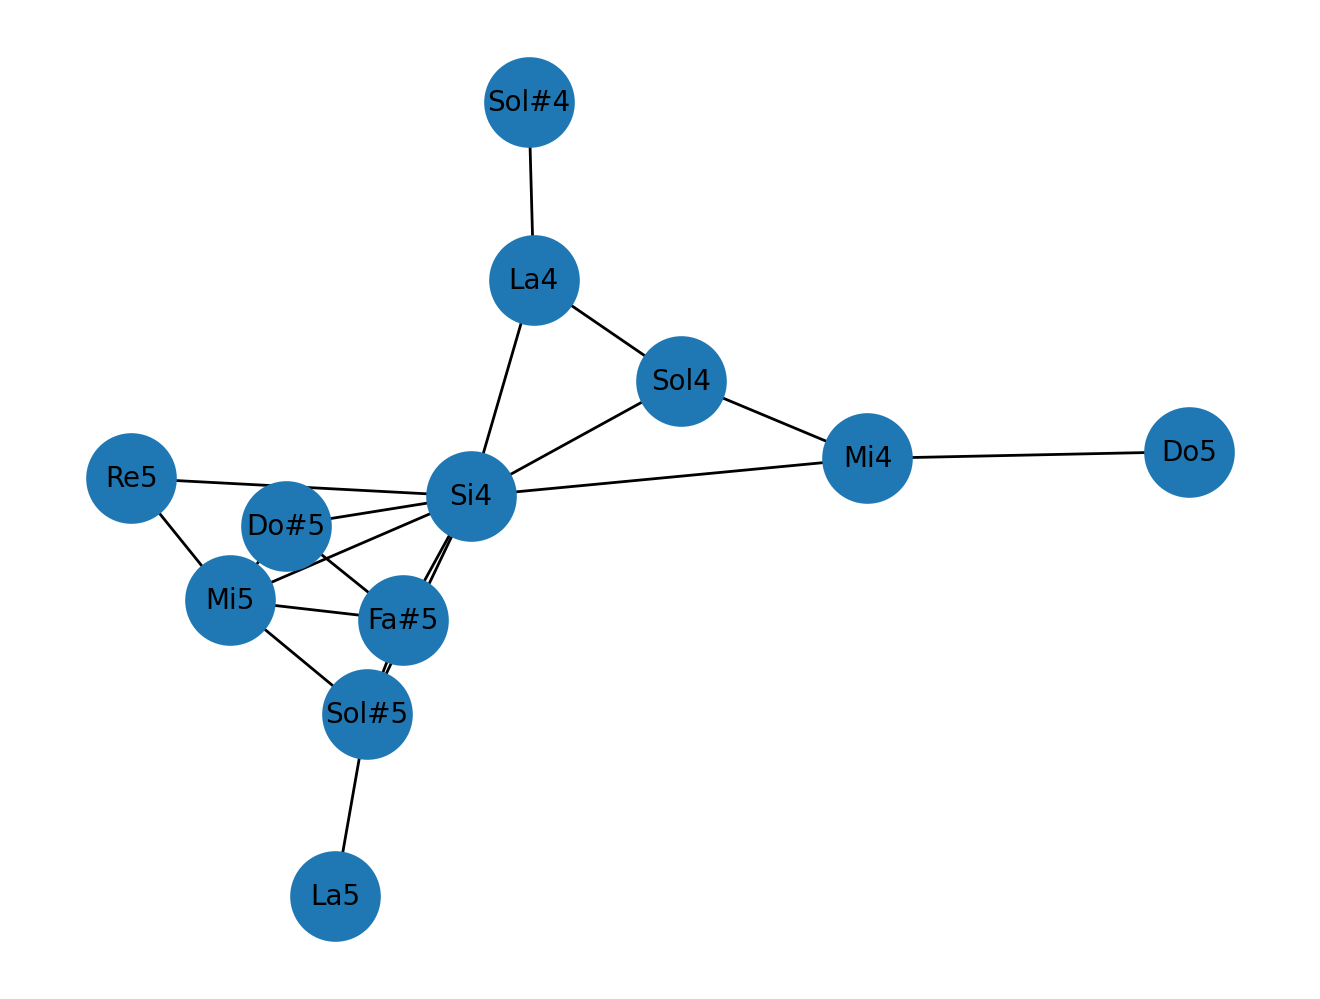

In [11]:
'''6) Draw the network. Check the above results by looking at the drawing. Any other interesting observations can be also discussed.'''
# draw the network
drawGraph(G1_UD, labels=True)
drawGraph(G2_UD, labels=True)

## 2. Node analysis (directed case)
- For each of the obtained directed networks, conduct following analyses. Compare the results for the
two songs and discuss similarities/dissimilarities.
  1) Obtain various centrality measures of the nodes, including eigenvector centrality, Katz centrality, PageRank, closeness centrality, betweenness centrality, etc. Which nodes have large or small centrality values? How are the distributions of the centrality measures?
  2) Examine pair-wise correlation between the centrality measures in order to understand which centrality measures are similar to or different from each other.
  3) Examine the reciprocity.
---------


In [12]:
'''1) Obtain various centrality measures of the nodes, including eigenvector centrality, Katz centrality, PageRank, closeness centrality, betweenness centrality, etc. Which nodes have large or small centrality values? How are the distributions of the centrality measures?'''
'''1-1) Obtain various centrality measures of the nodes, including eigenvector centrality, Katz centrality, PageRank, closeness centrality, betweenness centrality, etc.'''
# eigenvector centrality
eigenvector_centrality1 = nx.eigenvector_centrality(G1_D)
print("eigenvector centrality (G1-directed) is\n", eigenvector_centrality1)
eigenvector_centrality2 = nx.eigenvector_centrality(G2_D)
print("eigenvector centrality (G2-directed) is\n", eigenvector_centrality2)
# Katz centrality
katz_centrality1 = nx.katz_centrality(G1_D)
print("Katz centrality (G1-directed) is\n", katz_centrality1)
katz_centrality2 = nx.katz_centrality(G2_D)
print("Katz centrality (G2-directed) is\n", katz_centrality2)
# pagerank
pagerank1 = nx.pagerank(G1_D)
print("pagerank (G1-directed) is\n", pagerank1)
pagerank2 = nx.pagerank(G2_D)
print("pagerank (G2-directed) is\n", pagerank2)
# closeness centrality
closeness_centrality1 = nx.closeness_centrality(G1_D)
print("closeness centrality (G1-directed) is\n", closeness_centrality1)
closeness_centrality2 = nx.closeness_centrality(G2_D)
print("closeness centrality (G2-directed) is\n", closeness_centrality2)
# betweenness centrality
betweenness_centrality1 = nx.betweenness_centrality(G1_D)
print("betweenness centrality (G1-directed) is\n", betweenness_centrality1)
betweenness_centrality2 = nx.betweenness_centrality(G2_D)
print("betweenness centrality (G2-directed) is\n", betweenness_centrality2)
# degree centrality
degree_centrality1 = nx.degree_centrality(G1_D)
print("degree centrality (G1-directed) is\n", degree_centrality1)
degree_centrality2 = nx.degree_centrality(G2_D)
print("degree centrality (G2-directed) is\n", degree_centrality2)

'''1-2) Which nodes have large or small centrality values?'''
centrality_dict1 = {}
centrality_dict1['eigenvector'] = eigenvector_centrality1
centrality_dict1['katz'] = katz_centrality1
centrality_dict1['pagerank'] = pagerank1
centrality_dict1['closeness'] = closeness_centrality1
centrality_dict1['betweenness'] = betweenness_centrality1
centrality_dict1['degree'] = degree_centrality1

for key, value in centrality_dict1.items():
    print("nodes[1] with largest", key, "are", [k for k, v in value.items() if v == max(value.values())], "value is", max(value.values()))
    print("nodes[1] with smallest", key, "are", [k for k, v in value.items() if v == min(value.values())], "value is", min(value.values())) 

centrality_dict2 = {}
centrality_dict2['eigenvector'] = eigenvector_centrality2
centrality_dict2['katz'] = katz_centrality2
centrality_dict2['pagerank'] = pagerank2
centrality_dict2['closeness'] = closeness_centrality2
centrality_dict2['betweenness'] = betweenness_centrality2
centrality_dict2['degree'] = degree_centrality2

for key, value in centrality_dict2.items():
    print("nodes[2] with largest", key, "are", [k for k, v in value.items() if v == max(value.values())], "value is", max(value.values()))
    print("nodes[2] with smallest", key, "are", [k for k, v in value.items() if v == min(value.values())], "value is", min(value.values())) 


eigenvector centrality (G1-directed) is
 {'Sol4': 0.3598554003554351, 'Do4': 0.44542042815173355, 'Re4': 0.3640114360706766, 'Mi4': 0.41526239503588874, 'Sol3': 0.43919744961158663, 'Fa4': 0.09107483509112445, 'La3': 0.22414267951427458, 'La4': 0.22845452045003187, 'Do5': 0.19385654717221726, 'Mi5': 0.07264643912972271, 'Re5': 0.13737374768562285, 'Si4': 0.04251710385163718}
eigenvector centrality (G2-directed) is
 {'Si4': 0.4673029679516404, 'Mi5': 0.45752510899548016, 'Sol#5': 0.30522717538931776, 'La5': 0.09246814102569026, 'La4': 0.2259318154449393, 'Sol#4': 0.06844690329094578, 'Do#5': 0.2801771609662368, 'Fa#5': 0.45752510899548016, 'Re5': 0.2801771609662368, 'Sol4': 0.21001694643024182, 'Mi4': 0.06362534186172569, 'Do5': 0.019275656942784943}
Katz centrality (G1-directed) is
 {'Sol4': 0.326147692167567, 'Do4': 0.3572769216204474, 'Re4': 0.3073796139003969, 'Mi4': 0.35128279601983753, 'Sol3': 0.35686260739563436, 'Fa4': 0.20335094001808504, 'La3': 0.2647289074517431, 'La4': 0.284

In [13]:
degree_centrality1

{'Sol4': 1.0,
 'Do4': 1.0909090909090908,
 'Re4': 0.7272727272727273,
 'Mi4': 1.0,
 'Sol3': 1.0,
 'Fa4': 0.18181818181818182,
 'La3': 0.4545454545454546,
 'La4': 0.6363636363636364,
 'Do5': 1.0,
 'Mi5': 0.36363636363636365,
 'Re5': 0.5454545454545454,
 'Si4': 0.18181818181818182}

> 1번 곡에서는 Do4, Si4 가 centrality 가 가장 높고, 2번 곡에서는 Do4, Si4 가 centrality 가 가장 높다.  
> 낮은 순으로는 1번 곡에서는 Fa4, La4, 2번 곡에서는 Fa4, La4 가 centrality 가 가장 낮다. 

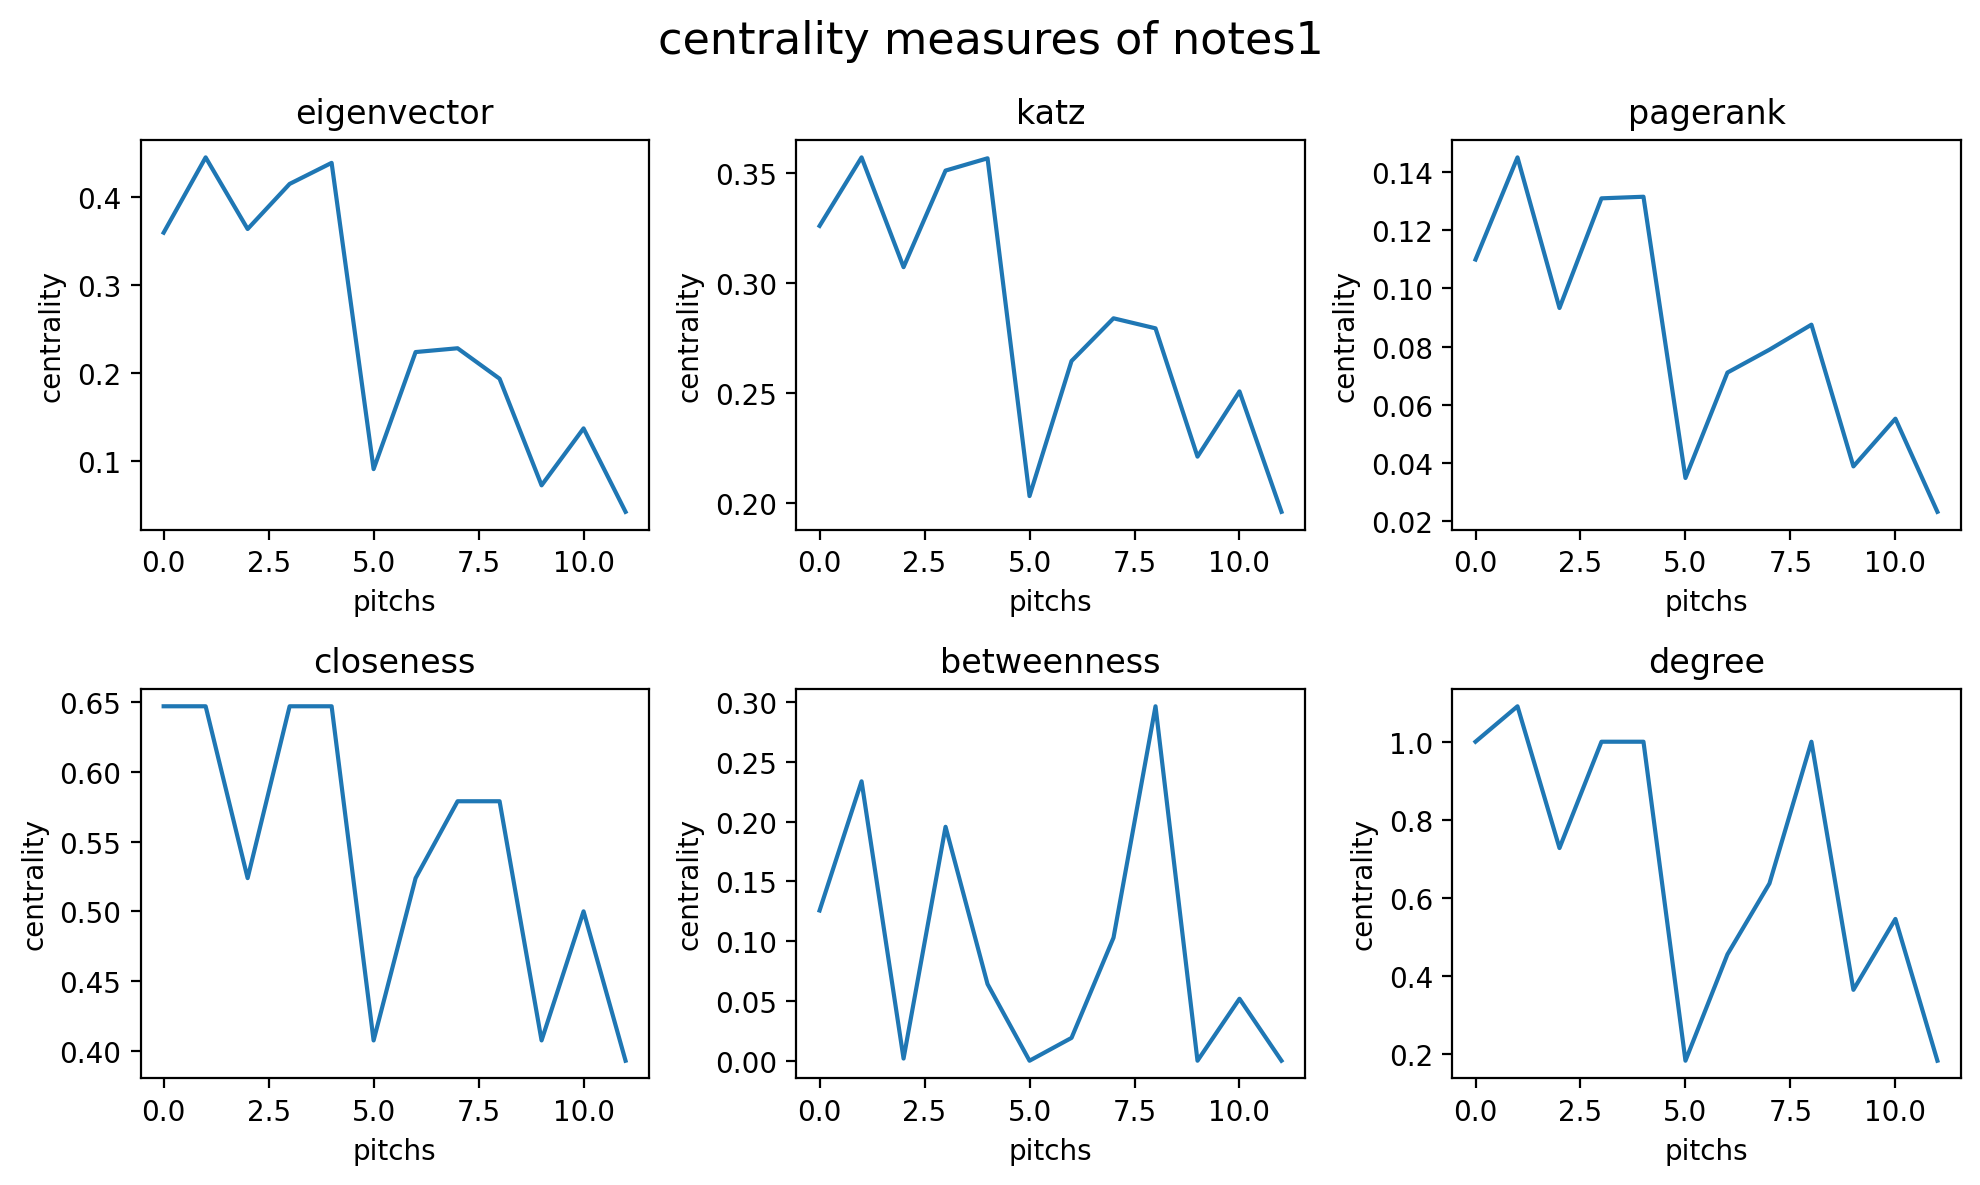

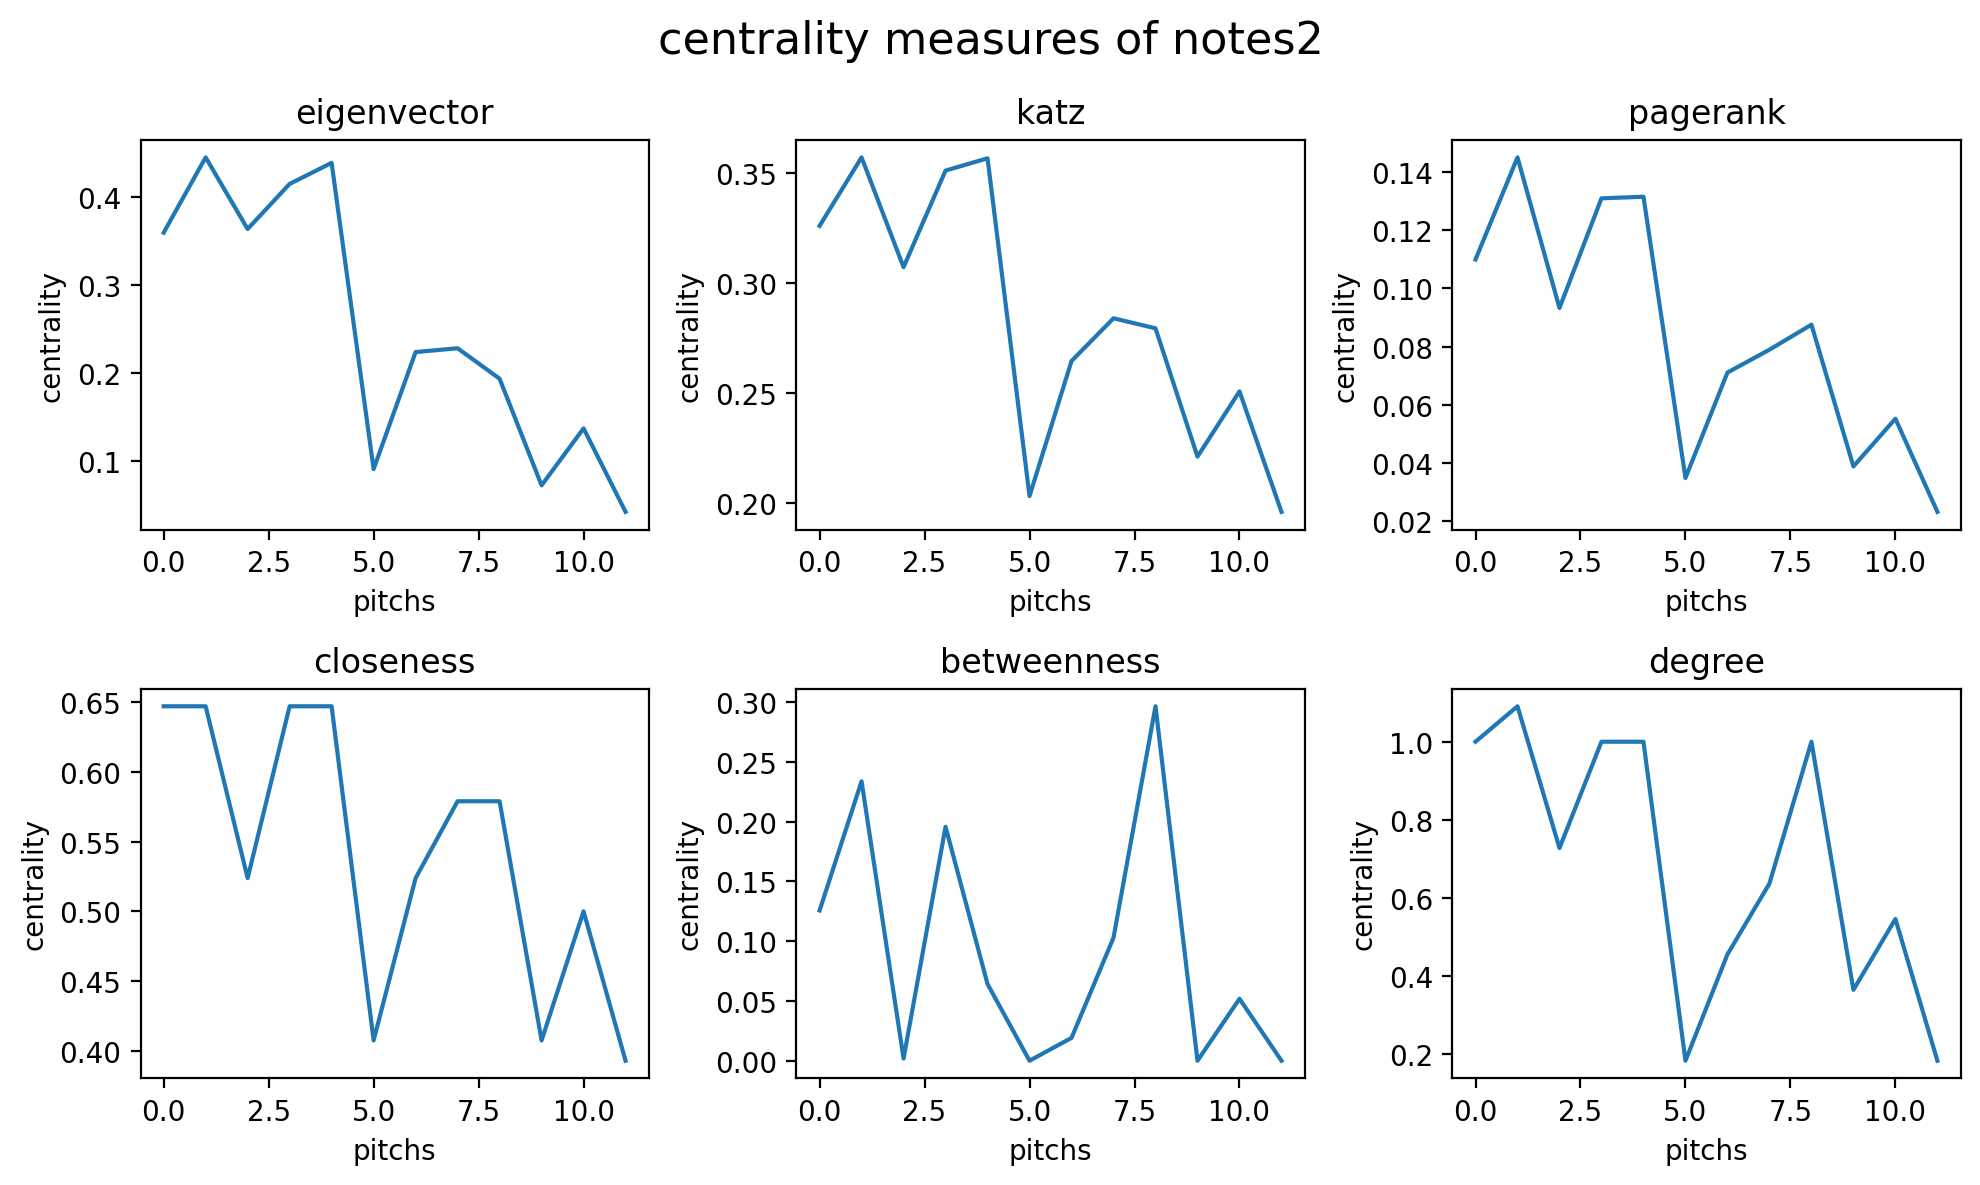

In [14]:
'''1-3) How are the distributions of the centrality measures?'''
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, key in enumerate(centrality_dict1):
    axes[i//3, i%3].plot(centrality_dict1[key].values())
    axes[i//3, i%3].set_title(key)
    axes[i//3, i%3].set_xlabel('pitchs')
    axes[i//3, i%3].set_ylabel('centrality')
fig.suptitle('centrality measures of notes1', fontsize=16)
fig.tight_layout(h_pad=1.0, w_pad=1.0)
fig.savefig(figures_path.joinpath('centrality measures of notes1.png'), dpi=300)
fig.show()
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, key in enumerate(centrality_dict2):
    axes[i//3, i%3].plot(centrality_dict1[key].values())
    axes[i//3, i%3].set_title(key)
    axes[i//3, i%3].set_xlabel('pitchs')
    axes[i//3, i%3].set_ylabel('centrality')
fig.suptitle('centrality measures of notes2', fontsize=16)
fig.tight_layout(h_pad=1.0, w_pad=1.0)
fig.savefig(figures_path.joinpath('centrality measures of notes2.png'), dpi=300)
fig.show()

KeyboardInterrupt: 

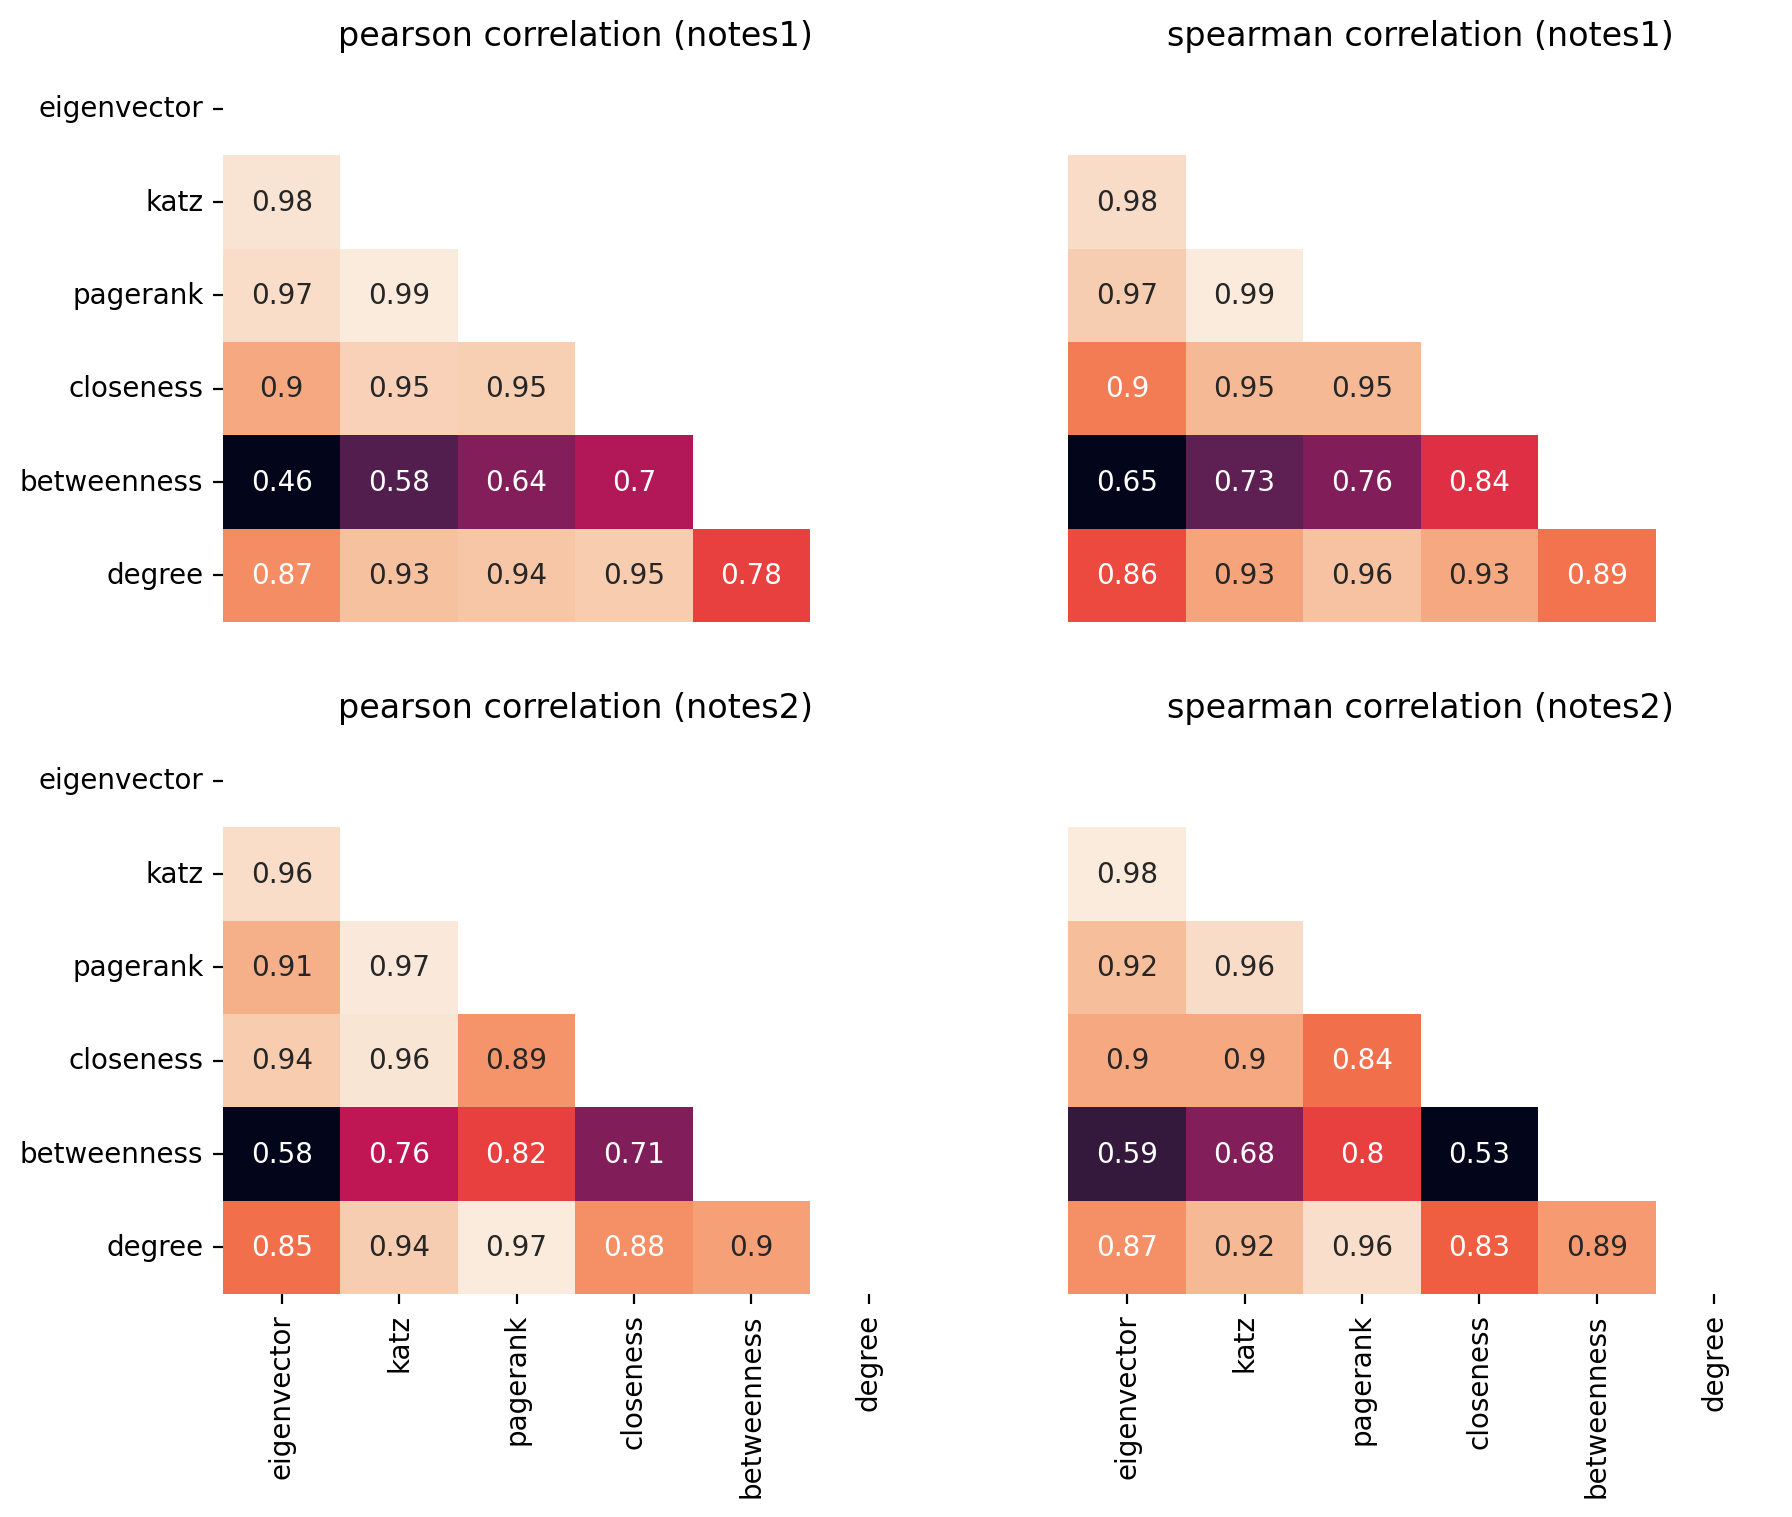

In [15]:
'''2) Examine pair-wise correlation between the centrality measures in order to understand which centrality measures are similar to or different from each other.'''

'''2-1)Examine pair-wise correlation between the centrality measures'''
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# plot1. pearson correlation (notes1)
pearson_correlation1 = pd.DataFrame(centrality_dict1).corr(method='pearson')
mask = np.triu(np.ones_like(pearson_correlation1, dtype=bool)) # fill upper triangle with NaNs
ax = sns.heatmap(pearson_correlation1, mask=mask, annot=True, ax=axes[0, 0])
ax.set_title('pearson correlation (notes1)')
ax.get_xaxis().set_visible(False)
ax.collections[0].colorbar.remove()

# plot2. spearman correlation (notes1)
spearman_correlation1 = pd.DataFrame(centrality_dict1).corr(method='spearman')
mask = np.triu(np.ones_like(spearman_correlation1, dtype=bool)) # fill upper triangle with NaNs
ax = sns.heatmap(spearman_correlation1, mask=mask, annot=True, ax=axes[0, 1])
ax.set_title('spearman correlation (notes1)')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.collections[0].colorbar.remove()

# plot3. pearson correlation (notes2)
pearson_correlation2 = pd.DataFrame(centrality_dict2).corr(method='pearson')
mask = np.triu(np.ones_like(pearson_correlation2, dtype=bool)) # fill upper triangle with NaNs
ax = sns.heatmap(pearson_correlation2, mask=mask, annot=True, ax=axes[1, 0])
ax.set_title('pearson correlation (notes2)')
ax.collections[0].colorbar.remove()

# plot4. spearman correlation (notes2)
spearman_correlation2 = pd.DataFrame(centrality_dict2).corr(method='spearman')
mask = np.triu(np.ones_like(spearman_correlation2, dtype=bool)) # fill upper triangle with NaNs
ax = sns.heatmap(spearman_correlation2, mask=mask, annot=True, ax=axes[1, 1])
ax.set_title('spearman correlation (notes2)')
ax.get_yaxis().set_visible(False)
ax.collections[0].colorbar.remove()

fig.savefig(figures_path.joinpath('pair-wise correlation between the centrality measures.png'), dpi=300)
fig.show()


> degree centrality : the number of neighbors  
> eigenvalues centrality : negihbors' neighbors  
> katz centrality : Eigenvector centrality와 거의 동일한데, constant항과 주변 node의 중심성에 계수를 적용해서 eigenvector의 반영 강도를 조정할 수 있다.   
> closeness_centraliy : the average distance to all other nodes  
> betweenness centrality : the number of shortest paths that pass through a node  
> pagerank : the number of links to a node  

> Centrality를 확인하였을 때, 최단경로를 기반으로 하는 Betweenness centrality가 다른 centrality와 달리 조금 이질적인 특성을 보였다.  
> 하지만 곡 1번인 iu-blueming 곡에서는 Betweeness centrality가 clossness centrality와 유사하게 나타났다.  m


In [ ]:
'''3) Examine the reciprocity.'''
# reciprocity
reciprocity1 = nx.overall_reciprocity(G1_D)
print("reciprocity (G1-undirected) is", reciprocity1)
reciprocity2 = nx.overall_reciprocity(G2_D)
print("reciprocity (G2-undirected) is", reciprocity2)

> reciprocity is a measure of the likelihood of vertices in a directed network to be mutually linked  
> this is using the ratio of the number of links pointing in both directions ${\displaystyle L^{<->}}L^{<->}$ to the total number of links L ${\ r={\frac {L^{<->}}{L}}}r = \frac {L^{<->}}{L}$